In [1]:
import pytc
%matplotlib inline

# libraries for making pretty sliders
#from IPython.html import widgets
#from IPython.html.widgets import interactive"
#from IPython.display import display


{'dilution_intercept': 1.0529402087854787, 'fx_competent': 1.0771734843683372, 'K': 11189.906464740801, 'dH': -5972.144816880611, 'dilution_heat': -3025.9029530949911}


/home/harmsm/Desktop/pytc/pytc/models/single_site.py:57: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


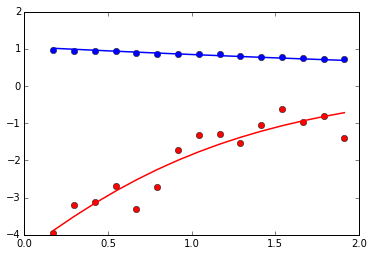

In [6]:

f = pytc.GlobalFit({"K":1e6,"beta1":1e6,"beta2":1e6,"beta3":1e6,
                    "dH":-4000,"dH1":-4000,"dH2":-4000,"dH3":1e6,
                    "fx_competent":1.0,
                    "dilution_heat":0.0,
                    "dilution_intercept":0.0})

e1 = pytc.ITCExperiment("test-data/blank.DH",pytc.models.Blank)
f.add_experiment(e1)

e2 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.BindingPolynomial,num_sites=1) 
#f.add_experiment(e2)

#e3 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.SingleSite)
f.add_experiment(e3)


f.fit()
f.plot()
print(f.fit_param)


In [ ]:

f = pytc.GlobalFit({"K":1e6,"beta1":1e6,"beta2":1e6,"beta3":1e6,
                    "dH":-4000,"dH1":-4000,"dH2":-4000,"dH3":1e6,
                    "fx_competent":1.0,
                    "dilution_heat":0.0,
                    "dilution_intercept":0.0})

e1 = pytc.ITCExperiment("test-data/wacky-double-2.DH",pytc.models.BindingPolynomial,num_sites=3)
f.add_experiment(e1)

#e2 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.BindingPolynomial,num_sites=1) 
#f.add_experiment(e2)

#e3 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.SingleSite)
#f.add_experiment(e3)


f.fit()
f.plot()
print(f.fit_param)

In [ ]:

# Set up the global fit with parameter guesses
fitter = pytc.GlobalFit({"beta1":1e6,"dH1":-4000,"beta2":-10,"dH2":-2000,"fx_competent":1.0, "dilution_heat":0.0,
                         "K":1e6,"dH":-2000,"fx2":1.0,"dil2":0.0})

# Load in an experiment
#e1 = pytc.ITCExperiment("test-data/wacky-double-1.DH",pytc.models.BindingPolynomial,num_sites=1)#pytc.models.SingleSite) #pytc.models.BindingPolynomial,num_sites=1)

# Associate the global K1 parameter with the local KA parameter, etc.
#fitter.add_experiment(e1) #,dilution_heat=10000.0)

# Load in another experiment
e2 = pytc.ITCExperiment("test-data/hA5NCX1TESCaTCEP.DH",pytc.models.SingleSiteCompetitor)
fitter.add_experiment(e2,{"K":"K",
                          "dH":"dH",
                          "fx2":"fx_competent",
                          "dil2":"dilution_heat"})

# Do the global fit
fitter.fit()

# Plot the fit
fitter.plot()

# Print out the final fit parameters
print(fitter.fit_param)